# Data Loading

### Loading Libraries

In [58]:
import xgboost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

### Loading dataset

In [59]:
sub_data = pd.read_csv(
    "/home/nailsonseat/Desktop/Datasets/MLP_project_datasets/test_data_v2.csv")
train_data = pd.read_csv(
    "/home/nailsonseat/Desktop/Datasets/MLP_project_datasets/train_data_v2.csv")

### Extracting features and target variable

In [60]:
X=train_data.drop('Made_Purchase',axis=1)
y=pd.DataFrame(train_data['Made_Purchase'])

### Splitting in train and test data

In [61]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [62]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

# Data Exploration

### Description

The first six columns represent the different pages in the e-commerce website visited by a user from other sites.

* HomePage: Number of times visited this page

*   HomePage_Duration: Total number of duration spent on this page.

*   LandingPage: Number of times visited this page

*   LandingPage_Duration: Total number of duration spent on this page.

*   ProductDesriptionPage Number of times visited this page

*   ProductDescriptionPage_Duration: Total number of duration spent on this page.

*   GoogleMetric-Bounce Rate: Whenever a user comes to any one web-page of the website and he/she does not go to any other page and exits from the website from the same page, then this activity done by the user is called Bounce. And the percentage of the total number of times the user visiting our website and bounce it, is called Bounce Rate

*   GoogleMetric-Exit Rate: The bounce rate is calculated based on the user exiting a website after visiting one page. But some users exit from the second, third, fourth, or any other page of our website, then those visitors’ data help determine the exit rate. The percentage of the total number of times the user to our website who do not exit from the first page (Landing Page) but exit after exploring other website pages is called the Exit Rate.

*   GoogleMetric-Page Value: Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction.

*   SeasonalPurchase: It is a weight indicator to track the seasonal purchase. If a user makes a purchase during any seasonal time (Mother’s Day, Diwali, Valentine's Day), we will assign based on internal heuristic.

*   Month_ SeasonalPurchase: Month of the special day considered for seasonal purchase.

The other attributes like, OS, Search Engine, Zone, Type of Traffic, Customer Type, Gender, Cookies Setting, Education, Marital Status and Weekend Purchase are self-explanatory variables

### Shapes

#### Training data

In [63]:
print(X_train.shape)
print(y_train.shape)

(11784, 21)
(11784, 1)


#### Testing data

In [64]:
print(X_test.shape)
print(y_test.shape)

(2947, 21)
(2947, 1)


### Data types of features

In [65]:
X_train.dtypes

HomePage                           float64
HomePage_Duration                  float64
LandingPage                        float64
LandingPage_Duration               float64
ProductDescriptionPage             float64
ProductDescriptionPage_Duration    float64
GoogleMetric:Bounce Rates          float64
GoogleMetric:Exit Rates            float64
GoogleMetric:Page Values           float64
SeasonalPurchase                   float64
Month_SeasonalPurchase              object
OS                                 float64
SearchEngine                       float64
Zone                               float64
Type of Traffic                    float64
CustomerType                        object
Gender                              object
Cookies Setting                     object
Education                           object
Marital Status                      object
WeekendPurchase                    float64
dtype: object

In [66]:
X_train[['Month_SeasonalPurchase','CustomerType','Gender','Cookies Setting','Education','Marital Status']].sample(10)

,Month_SeasonalPurchase,CustomerType,Gender,Cookies Setting,Education
3144,May,Returning_Visitor,Female,Required,Graduate
3124,May,Returning_Visitor,Female,ALL,Others
6976,Dec,Returning_Visitor,Male,Required,Others
8231,Dec,Other,Female,ALL,Graduate
4294,Jul,Returning_Visitor,Female,Deny,Diploma
127,Mar,Returning_Visitor,Female,ALL,Not Specified
10211,May,Returning_Visitor,Male,Deny,Not Specified
11089,May,Returning_Visitor,Male,ALL,Not Specified
2698,May,Returning_Visitor,Female,Deny,Graduate
9791,May,Returning_Visitor,Not Specified,Deny,Diploma


### Missing values

#### Training data

In [67]:
X_train.isna().sum()

HomePage                           114
HomePage_Duration                  114
LandingPage                        118
LandingPage_Duration               112
ProductDescriptionPage              98
ProductDescriptionPage_Duration    135
GoogleMetric:Bounce Rates          133
GoogleMetric:Exit Rates            108
GoogleMetric:Page Values            97
SeasonalPurchase                   119
Month_SeasonalPurchase             115
OS                                 101
SearchEngine                        98
Zone                                94
Type of Traffic                    118
CustomerType                       114
Gender                             120
Cookies Setting                    114
Education                          110
Marital Status                     102
WeekendPurchase                     98
dtype: int64

In [68]:
y_train.isna().sum()

Made_Purchase    0
dtype: int64

#### Testing data

In [69]:
X_test.isna().sum()

HomePage                           39
HomePage_Duration                  36
LandingPage                        35
LandingPage_Duration               23
ProductDescriptionPage             25
ProductDescriptionPage_Duration    32
GoogleMetric:Bounce Rates          18
GoogleMetric:Exit Rates            21
GoogleMetric:Page Values           35
SeasonalPurchase                   31
Month_SeasonalPurchase             29
OS                                 33
SearchEngine                       24
Zone                               23
Type of Traffic                    25
CustomerType                       30
Gender                             25
Cookies Setting                    30
Education                          26
Marital Status                     28
WeekendPurchase                    23
dtype: int64

In [70]:
y_test.isna().sum()

Made_Purchase    0
dtype: int64

### Outliers

#### Training data

array([[<AxesSubplot: title={'center': 'HomePage'}>,
        <AxesSubplot: title={'center': 'HomePage_Duration'}>,
        <AxesSubplot: title={'center': 'LandingPage'}>,
        <AxesSubplot: title={'center': 'LandingPage_Duration'}>],
       [<AxesSubplot: title={'center': 'ProductDescriptionPage'}>,
        <AxesSubplot: title={'center': 'ProductDescriptionPage_Duration'}>,
        <AxesSubplot: title={'center': 'GoogleMetric:Bounce Rates'}>,
        <AxesSubplot: title={'center': 'GoogleMetric:Exit Rates'}>],
       [<AxesSubplot: title={'center': 'GoogleMetric:Page Values'}>,
        <AxesSubplot: title={'center': 'SeasonalPurchase'}>,
        <AxesSubplot: title={'center': 'OS'}>,
        <AxesSubplot: title={'center': 'SearchEngine'}>],
       [<AxesSubplot: title={'center': 'Zone'}>,
        <AxesSubplot: title={'center': 'Type of Traffic'}>,
        <AxesSubplot: title={'center': 'WeekendPurchase'}>,
        <AxesSubplot: >]], dtype=object)

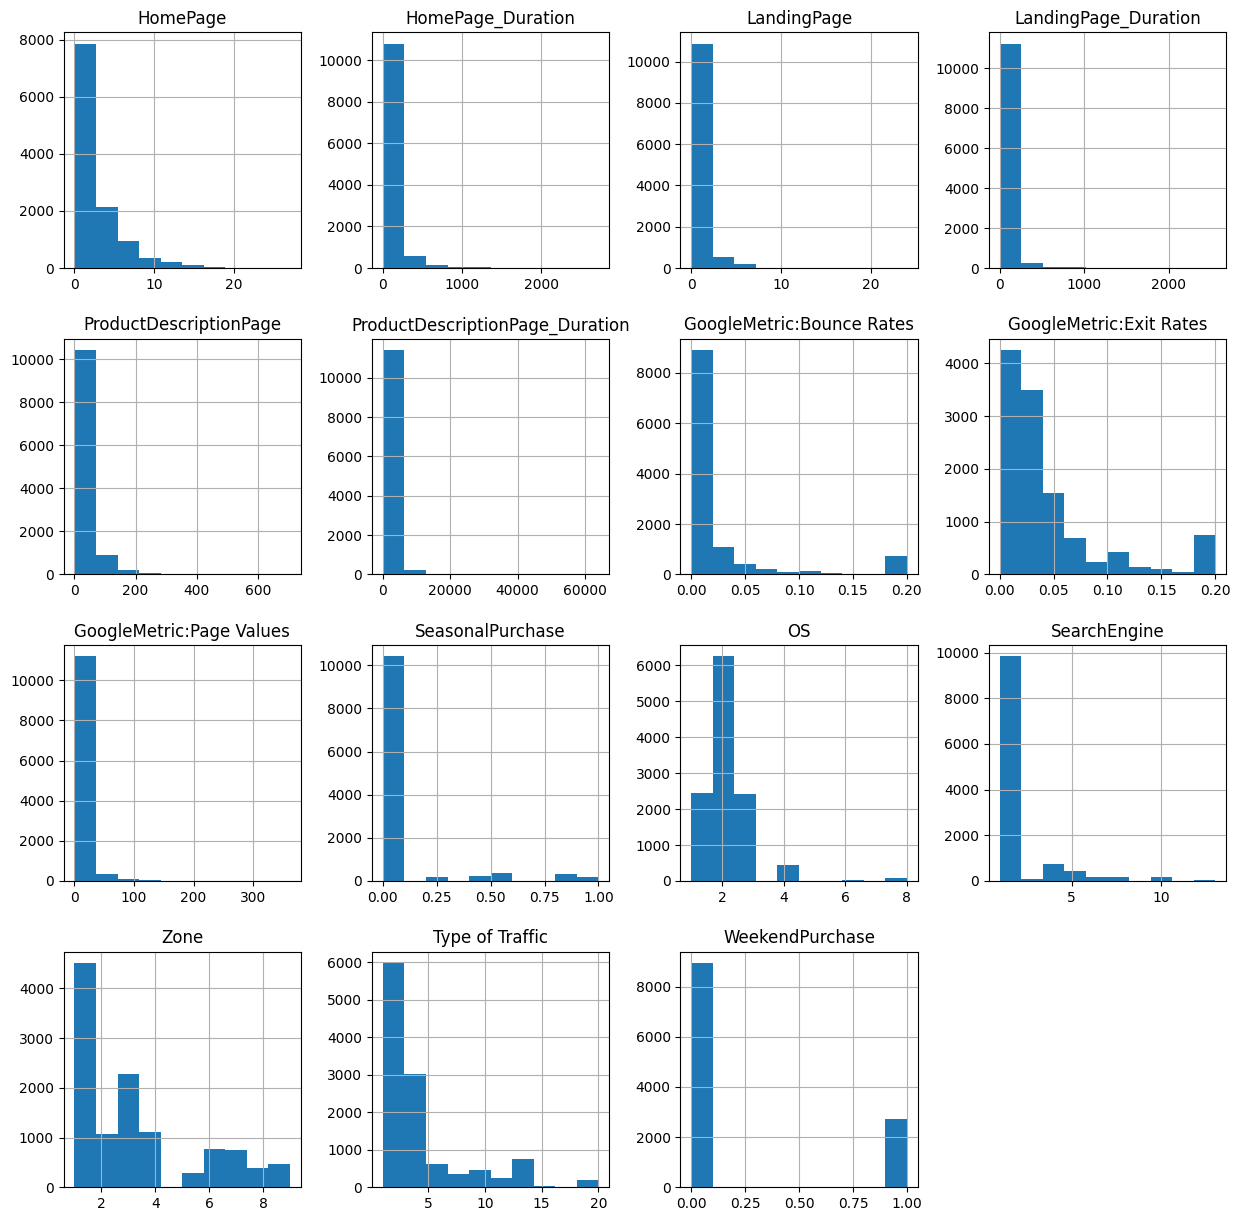

In [71]:
X_train.hist(figsize=(15,15))

#### Testing data

array([[<AxesSubplot: title={'center': 'HomePage'}>,
        <AxesSubplot: title={'center': 'HomePage_Duration'}>,
        <AxesSubplot: title={'center': 'LandingPage'}>,
        <AxesSubplot: title={'center': 'LandingPage_Duration'}>],
       [<AxesSubplot: title={'center': 'ProductDescriptionPage'}>,
        <AxesSubplot: title={'center': 'ProductDescriptionPage_Duration'}>,
        <AxesSubplot: title={'center': 'GoogleMetric:Bounce Rates'}>,
        <AxesSubplot: title={'center': 'GoogleMetric:Exit Rates'}>],
       [<AxesSubplot: title={'center': 'GoogleMetric:Page Values'}>,
        <AxesSubplot: title={'center': 'SeasonalPurchase'}>,
        <AxesSubplot: title={'center': 'OS'}>,
        <AxesSubplot: title={'center': 'SearchEngine'}>],
       [<AxesSubplot: title={'center': 'Zone'}>,
        <AxesSubplot: title={'center': 'Type of Traffic'}>,
        <AxesSubplot: title={'center': 'WeekendPurchase'}>,
        <AxesSubplot: >]], dtype=object)

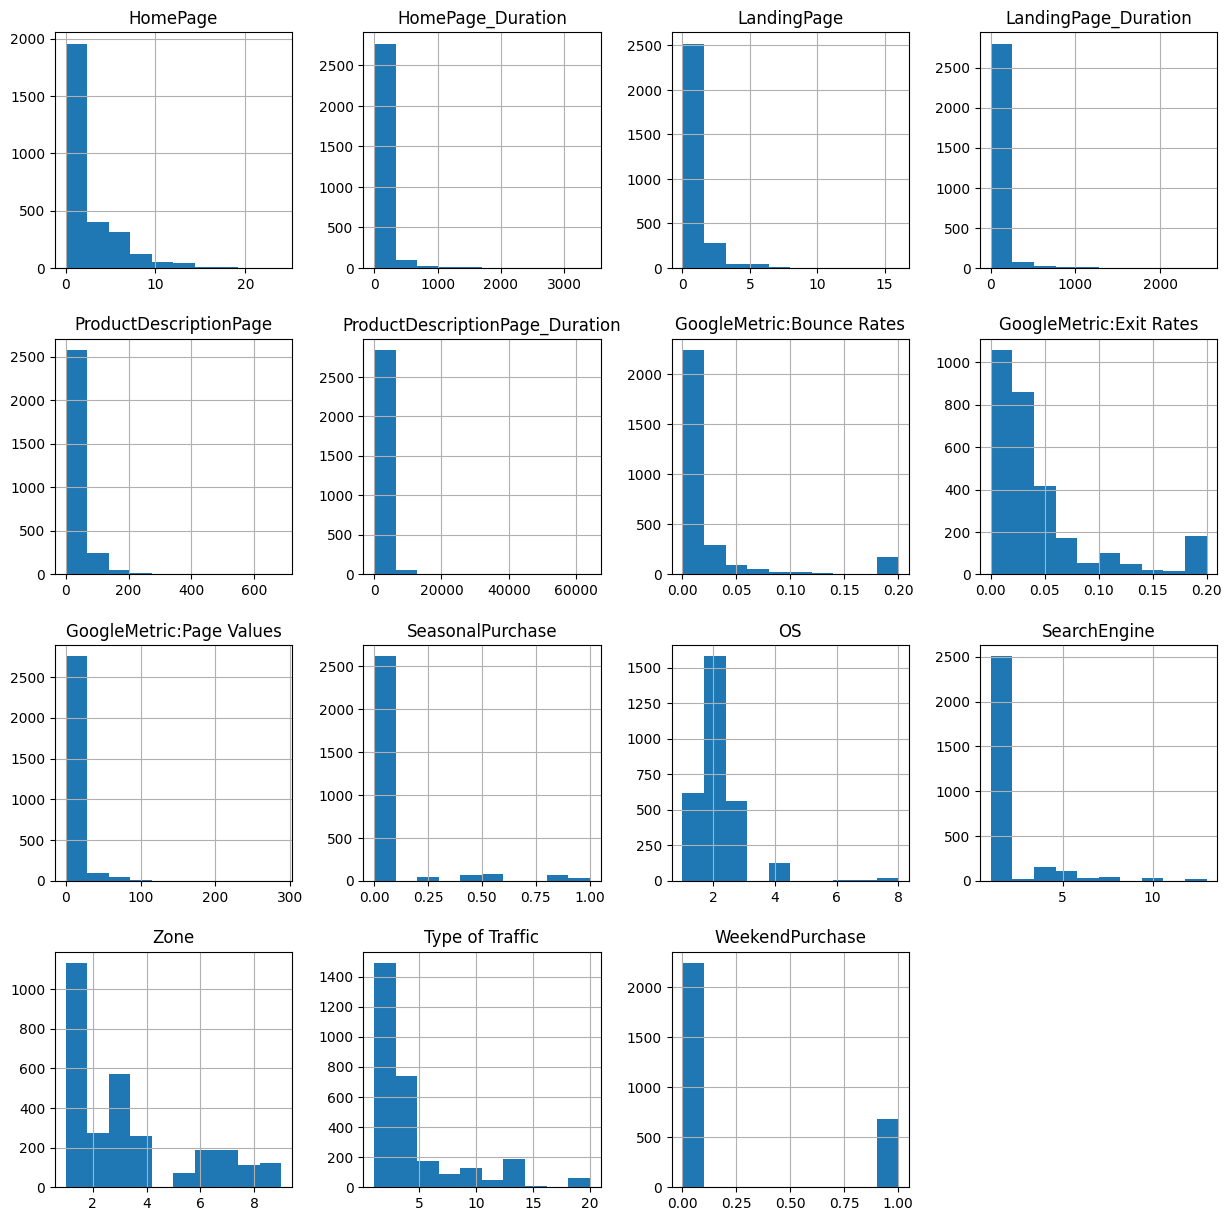

In [72]:
X_test.hist(figsize=(15,15))

### Correlations

### Training data

/tmp/ipykernel_32671/4185083827.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.drop(['Month_SeasonalPurchase','CustomerType','Gender','Cookies Setting','Education'],axis=1).corr())


<AxesSubplot: >

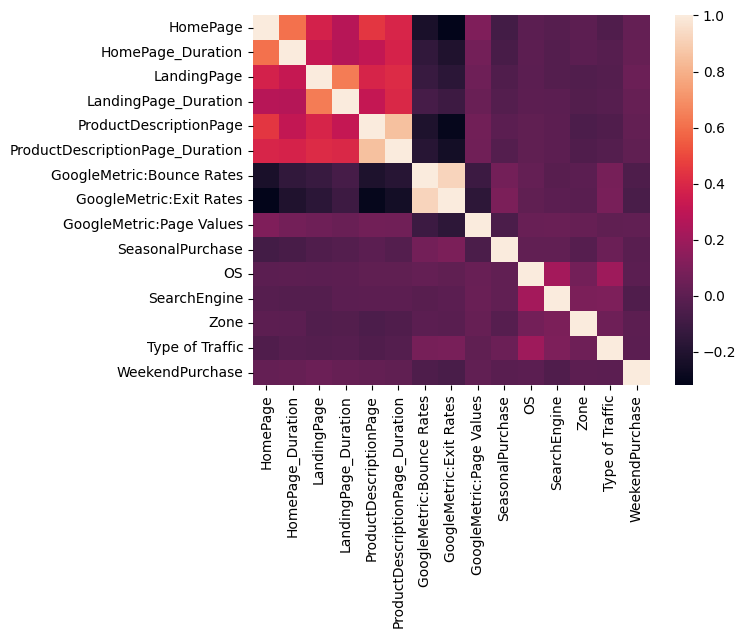

In [77]:
sns.heatmap(X_train.drop().corr())

### 